In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Johnson, Mr. Alfred",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johnson, Mr. Alfred",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
age_new = df.dropna().groupby(['Pclass', 'Sex']).apply(lambda df: round(df['Age'].median(), 0))
age_new

Pclass  Sex   
1       female    34.0
        male      40.0
2       female    29.0
        male      18.0
3       female    24.0
        male      25.0
dtype: float64

In [10]:
def fill_age(row):
    row['Age'] = age_new[row['Pclass']][row['Sex']]
    return row

df[df['Age'].isna()] = df[df['Age'].isna()].apply(lambda r: fill_age(r), axis=1)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df['Cabin'] = df['Cabin'].str[0]
pd.crosstab(df['Cabin'], df['Pclass'])

import random

df['Cabin'] = df['Cabin'].fillna(df['Pclass'].map({1: random.choice(['A', 'B', 'C', 'D', 'E']), 
                                                                              2: random.choice(['D', 'E', 'F']), 
                                                                              3: random.choice(['F', 'G'])
                                                                             }))



In [13]:

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df["Embarked"].isnull().sum()

0

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
df.drop(columns='PassengerId', inplace=True)

In [16]:
df.drop(columns='Name', inplace=True)

In [17]:
df.drop(['Ticket'], axis = 1, inplace = True)

In [18]:
df.drop('Cabin', axis = 1, inplace = True)

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
df.corr()[['Survived']].abs()

,Survived
Survived,1.000000
Pclass,0.338481
Age,0.053502
SibSp,0.035322
Parch,0.081629
Fare,0.257307


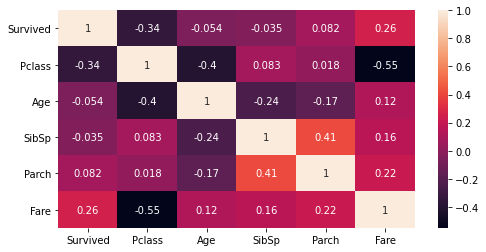

In [21]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot = True,linecolor="black")

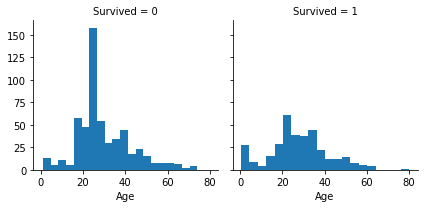

In [22]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

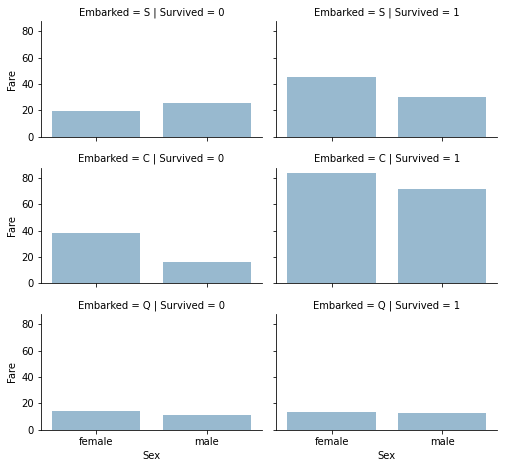

In [23]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


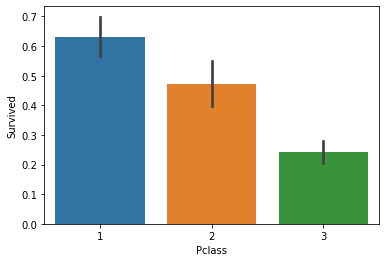

In [24]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=df)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df["Survived"][df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df["Survived"][df["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df["Survived"][df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


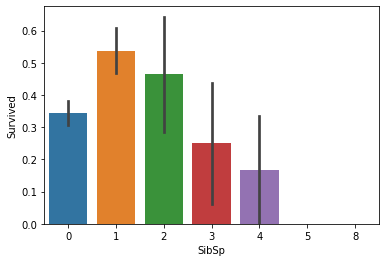

In [25]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=df)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", df["Survived"][df["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df["Survived"][df["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df["Survived"][df["SibSp"] == 2].value_counts(normalize = True)[1]*100)

Genderwise survival


Survived    0    1
Sex               
female     81  233
male      468  109


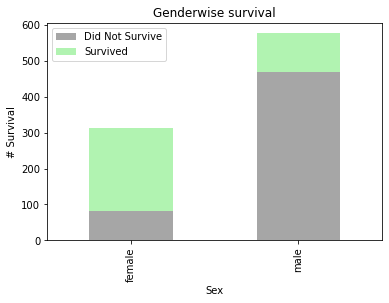

In [26]:
print('Genderwise survival')
print('\n')
print(df.groupby(['Sex','Survived']).Sex.count().unstack())

sex = df.groupby(['Sex','Survived']).Sex.count().unstack()
p2 = sex.plot(kind = 'bar', stacked = True,
                   color = ['grey','lightgreen'], alpha = .70)
p2.set_title('Genderwise survival')
p2.set_xlabel('Sex')
p2.set_ylabel('# Survival')
p2.legend(['Did Not Survive','Survived'])
plt.show()

In [27]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = df[df["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = df[df["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = df[df["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
646
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


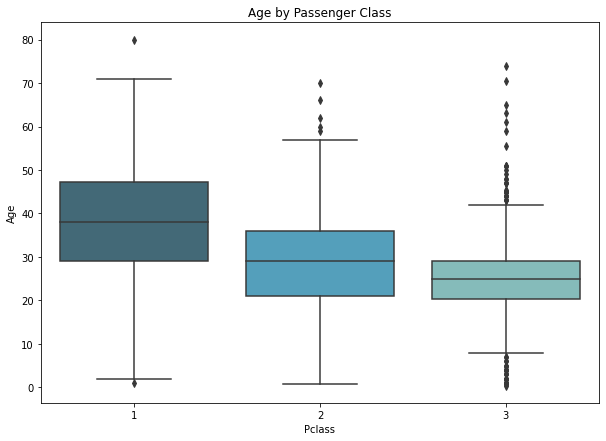

In [28]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

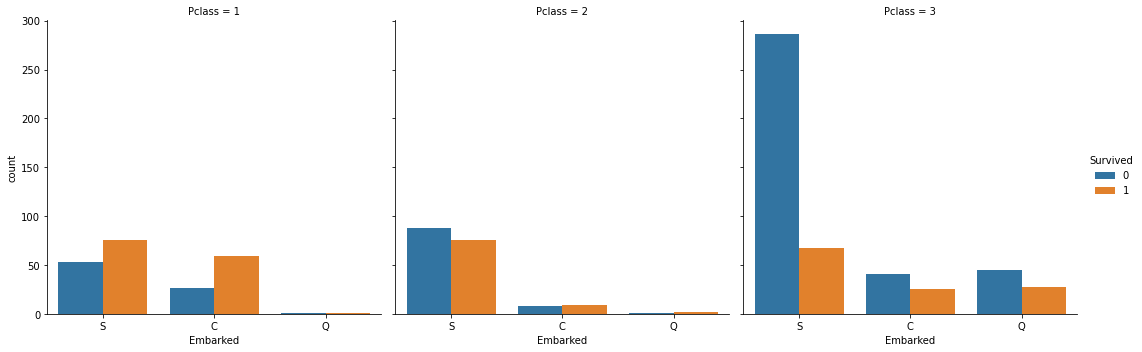

In [29]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = df)

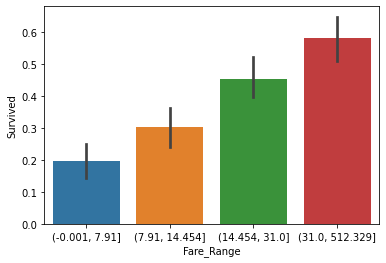

In [30]:
# Divide Fare into 4 bins
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = df)

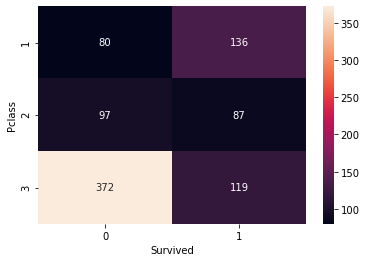

In [31]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

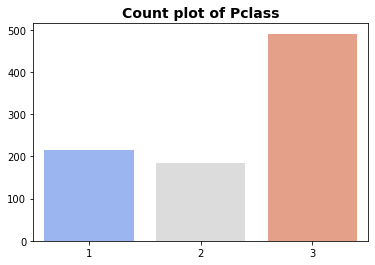

In [32]:
fig = sns.barplot(df['Pclass'].value_counts().index,df['Pclass'].value_counts().values, palette='coolwarm')
fig.set_title('Count plot of Pclass', fontsize=14, fontweight='bold')
fig.bar_label(fig.containers[0])
plt.show()

In [33]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for i in features:
        Q1 = np.percentile(df[i],25)
        Q3 = np.percentile(df[i],75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [34]:
df.loc[detect_outliers(df,["Age","SibSp","Parch","Fare"])]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Range
268,1,1,female,58.00,0,1,153.4625,S,"(31.0, 512.329]"
305,1,1,male,0.92,1,2,151.5500,S,"(31.0, 512.329]"
438,0,1,male,64.00,1,4,263.0000,S,"(31.0, 512.329]"
587,1,1,male,60.00,1,1,79.2000,C,"(31.0, 512.329]"
659,0,1,male,58.00,0,2,113.2750,C,"(31.0, 512.329]"
745,0,1,male,70.00,1,1,71.0000,S,"(31.0, 512.329]"
27,0,1,male,19.00,3,2,263.0000,S,"(31.0, 512.329]"
88,1,1,female,23.00,3,2,263.0000,S,"(31.0, 512.329]"
159,0,3,male,25.00,8,2,69.5500,S,"(31.0, 512.329]"
180,0,3,female,24.00,8,2,69.5500,S,"(31.0, 512.329]"


In [35]:
df = df.drop(detect_outliers(df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

In [36]:
df_len = len(df)

In [37]:
df.drop(columns='Fare_Range', inplace=True)

In [38]:
df.shape

(875, 8)

In [39]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [40]:
le = LabelEncoder()
df["Embarked"]= le.fit_transform(df["Embarked"])
print(df["Embarked"])

0      2
1      0
2      2
3      2
4      2
      ..
870    2
871    2
872    2
873    0
874    1
Name: Embarked, Length: 875, dtype: int32


In [41]:
le = LabelEncoder()
df["Sex"]= le.fit_transform(df["Sex"])
print(df["Sex"])

0      1
1      0
2      0
3      0
4      1
      ..
870    1
871    0
872    0
873    1
874    1
Name: Sex, Length: 875, dtype: int32


In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [43]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score<3).all(axis=1)]
print(df_1.shape)

(875, 8)
(816, 8)


In [44]:
df_1.skew()

Survived    0.458449
Pclass     -0.646186
Sex        -0.662031
Age         0.438889
SibSp       1.986280
Parch       2.160448
Fare        2.336672
Embarked   -1.286085
dtype: float64

In [45]:
from scipy.stats import boxcox

for col in df_1:
    if df_1[col].skew()>=.40:
        df_1[col]=np.cbrt(df_1[col]) 
    if df_1[col].skew()<= -.0:
        df_1[col]=np.power(df_1[col],2)

In [46]:
df_1.skew()

Survived    0.458449
Pclass     -0.443751
Sex        -0.662031
Age        -0.268524
SibSp       1.024832
Parch       1.676598
Fare        0.691297
Embarked   -1.093517
dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
x =df_1.drop('Survived',axis=1)
y =df_1['Survived']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
551,9,1,11.696071,0.0,0.0,1.991279,4
307,4,1,12.273798,1.0,1.0,2.971961,4
150,9,1,14.549966,0.0,0.0,2.004158,4
745,9,1,10.495085,0.0,0.0,2.004158,4
610,1,1,12.082761,1.0,0.0,3.745724,4


In [59]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

79.41

In [50]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

78.59

In [51]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

86.6

In [52]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

76.8

In [53]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

78.1

In [54]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
acc_sgd

79.9

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

96.19

In [57]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

98.53

In [60]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.53
7,Decision Tree,96.19
1,KNN,86.60
5,Stochastic Gradient Decent,79.90
2,Logistic Regression,79.41
0,Support Vector Machines,78.59
6,Linear SVC,78.10
4,Naive Bayes,76.80
